# K-Means clustering on online retail dataset

# Step 1: Define objective:
We'll cluster customers based on their buying behavior, such as:

Total money spent

Number of purchases

Number of unique products



# Step 2: import & Preprocess Data

In [3]:
import pandas as pd
import numpy as np

data = pd.read_excel('Online Retail.xlsx')
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [5]:
# total number of rows and columns
data.shape


(541909, 8)

In [6]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [13]:
# Missing Values
data.isnull().sum()
data.dropna(inplace=True)

# Check for duplicates
data.duplicated().sum()


# Remove duplicates
data.drop_duplicates(inplace=True)


In [21]:
# Create a new column for total price
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Aggregate data by CustomerID
customer_data = data.groupby('CustomerID').agg({
    'TotalPrice': 'sum',
    'InvoiceNo': 'nunique',
    'Quantity': 'sum'
}).rename(columns={
    "InvoiceNo": "NumPurchases"
}).reset_index()

# Filter out negative TotalPrice
customer_df = customer_data[(customer_data['TotalPrice'] > 0) & (customer_data['Quantity'] > 0)]

# Step 2: Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
# we select 'NumPurchases', 'Quantity', 'TotalPrice'
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[['NumPurchases', 'Quantity', 'TotalPrice']])

# Step 3: Chosse K

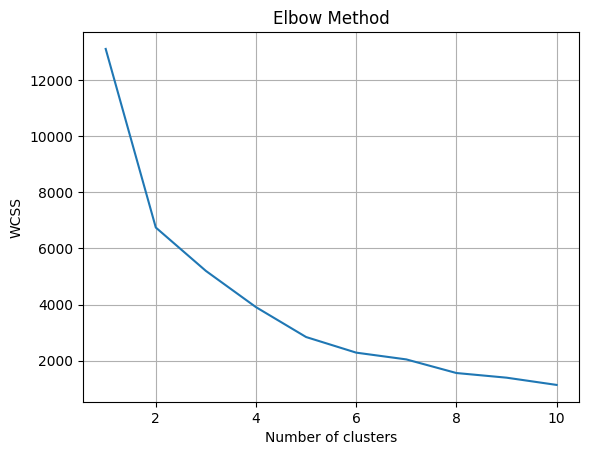

In [26]:
# Choose K with elbow method
from sklearn.cluster import KMeans

wcss= []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


# Step 4: Build Model

In [47]:
# we find that the elbow is at k=3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(scaled_features)




# Step 5: Visualizing All Clusters

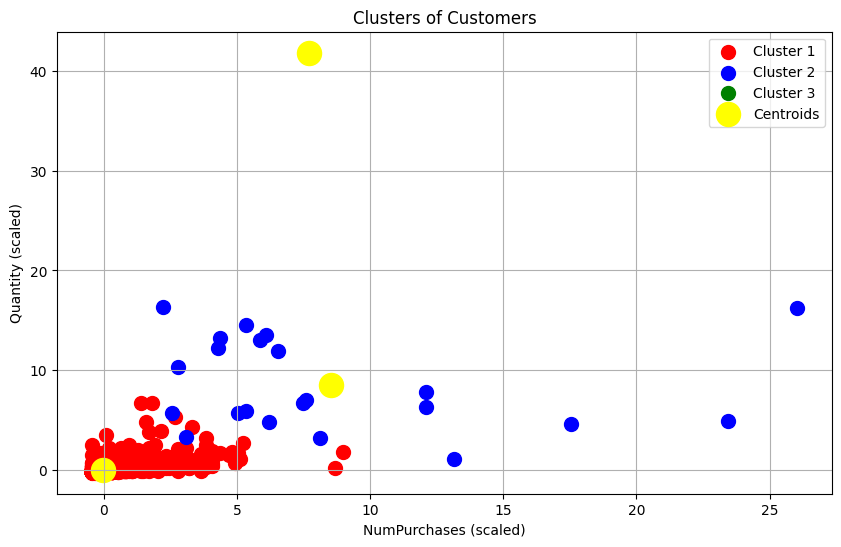

In [48]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[y_kmeans == 0, 0], scaled_features[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(scaled_features[y_kmeans == 1, 0], scaled_features[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(scaled_features[y_kmeans == 2, 0], scaled_features[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')




plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('NumPurchases (scaled)')
plt.ylabel('Quantity (scaled)')
plt.legend()
plt.grid(True)  
plt.show()


In [51]:
# Evaluate the clustering
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_features, y_kmeans)
print(f'Silhouette Score: {silhouette_avg:.2f}')



Silhouette Score: 0.95
